## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from gplearn.genetic import SymbolicRegressor
import os
import seaborn as sns
import matplotlib.pyplot as plt

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [2]:
df = pd.read_csv("../cleaned_data/winequality-white_fixed.csv", index_col=0)

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Checking Data

In [4]:
# Check to make sure that no columns have perfect colinearity

<AxesSubplot:>

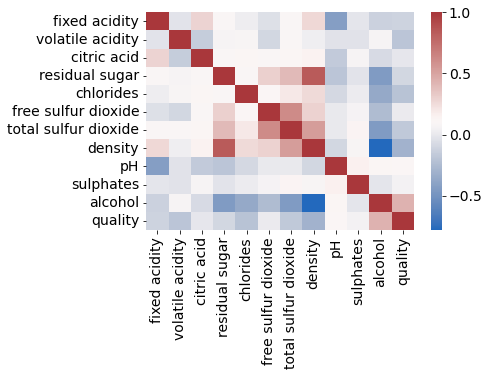

In [5]:
corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Breaking Data in X and y

In [6]:
X = df.iloc[:,:-1]

In [7]:
y = df.iloc[:,-1]

## Generating Models

### Linear Regression

In [8]:
lr = linear_model.LinearRegression()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:38   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


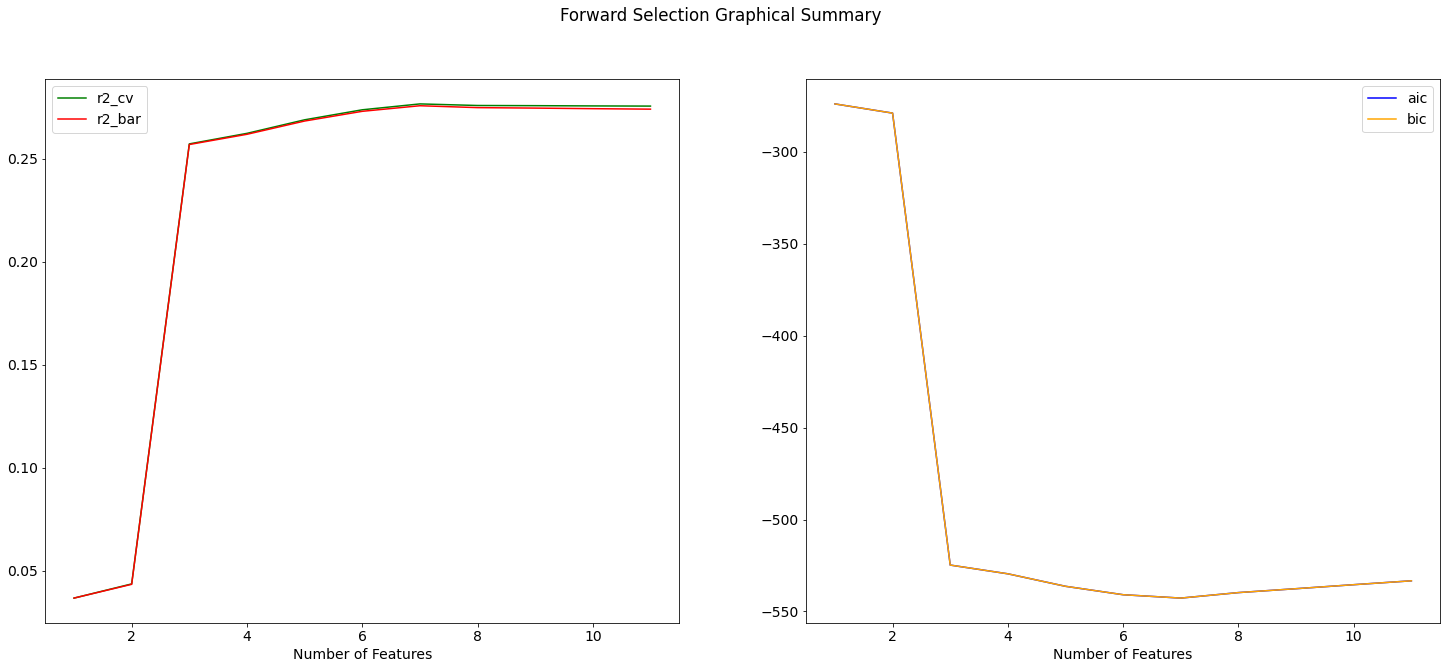

In [9]:
forwardSelection(lr, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:39   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


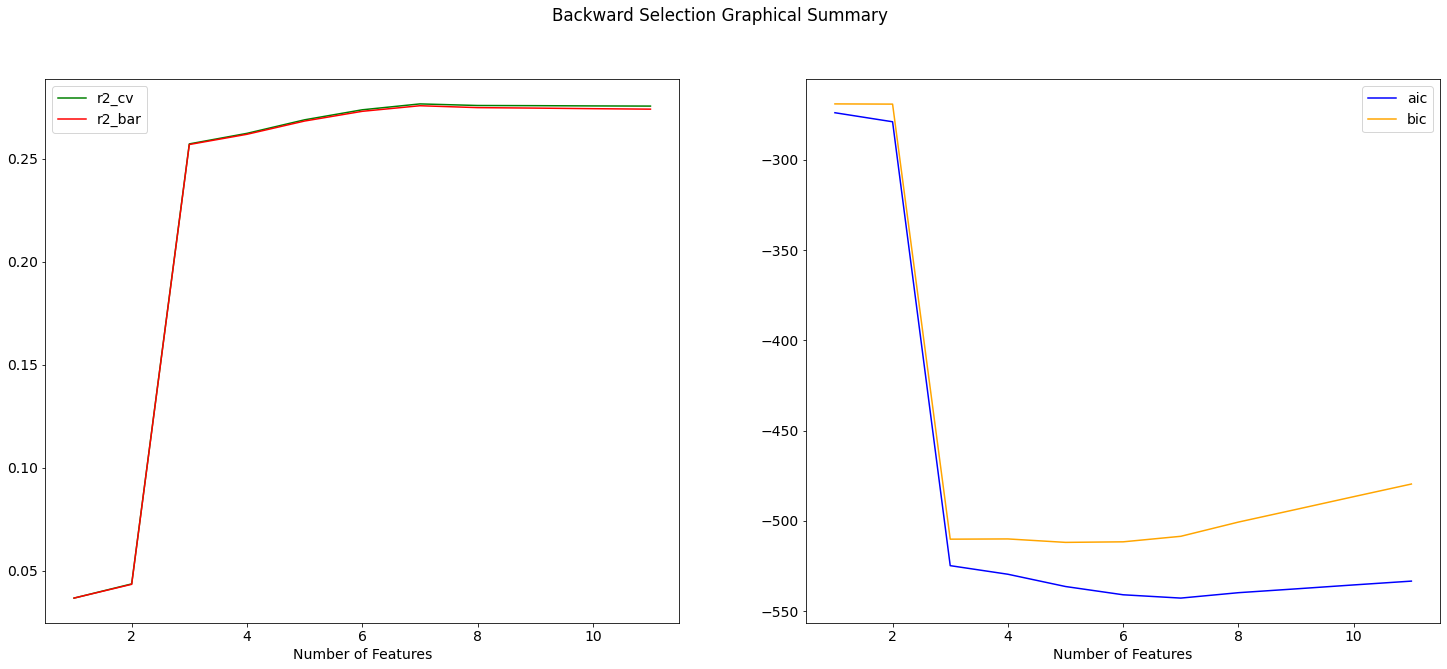

In [10]:
backwardSelection(lr, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:40   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


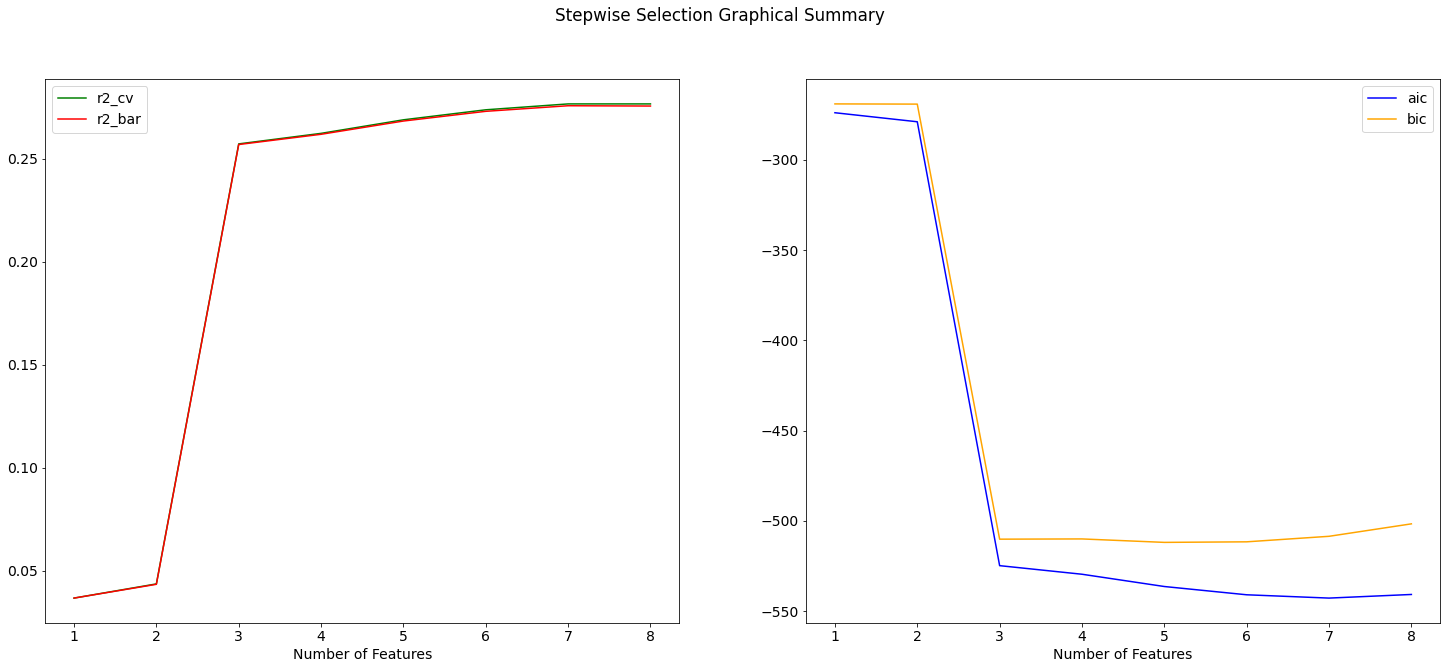

In [11]:
stepwiseSelection(lr, X, y)

### Ridge Regression

In [12]:
ridge = linear_model.Ridge()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:42   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


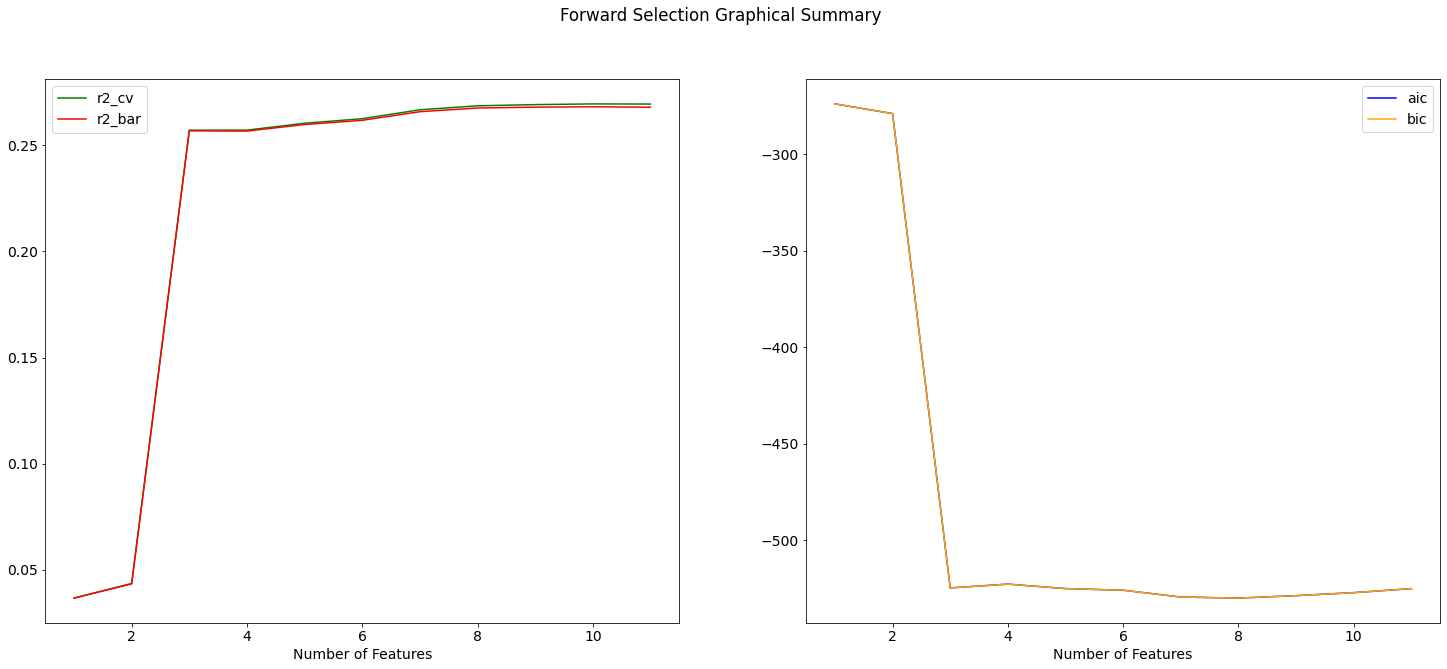

In [13]:
forwardSelection(ridge, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:43   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


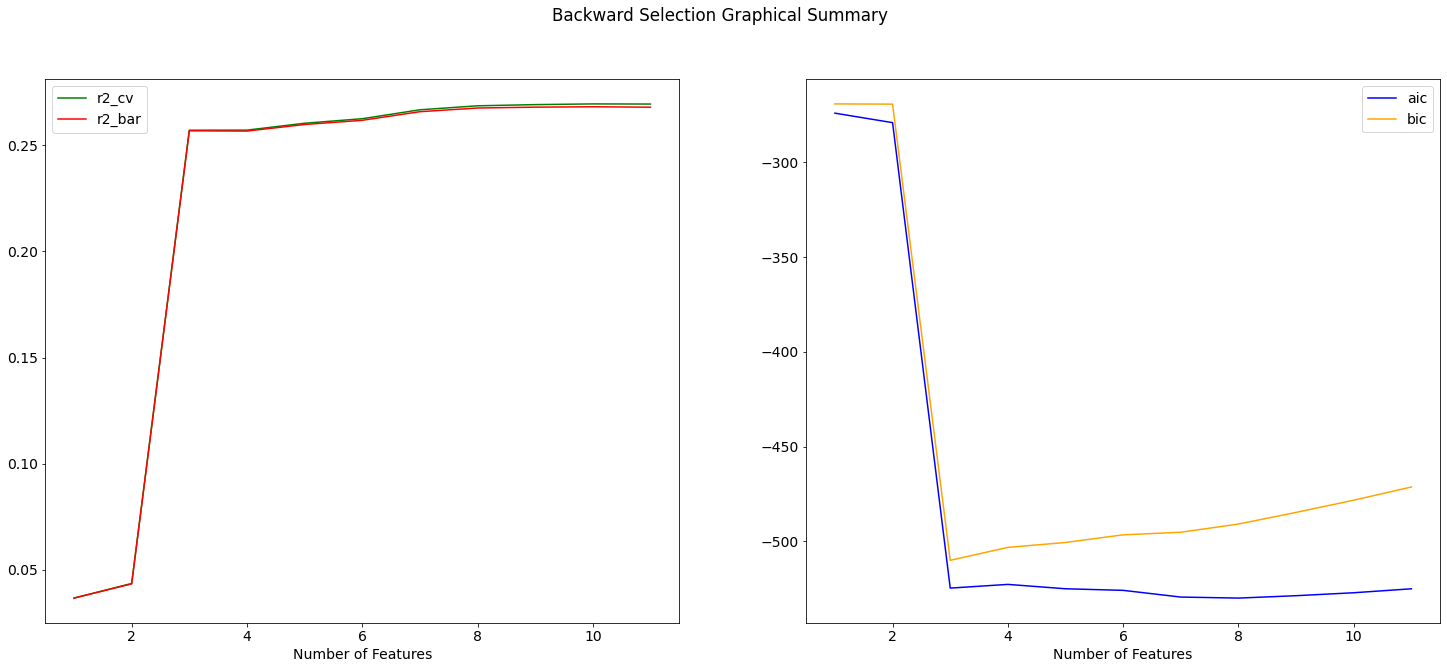

In [14]:
backwardSelection(ridge, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:44   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


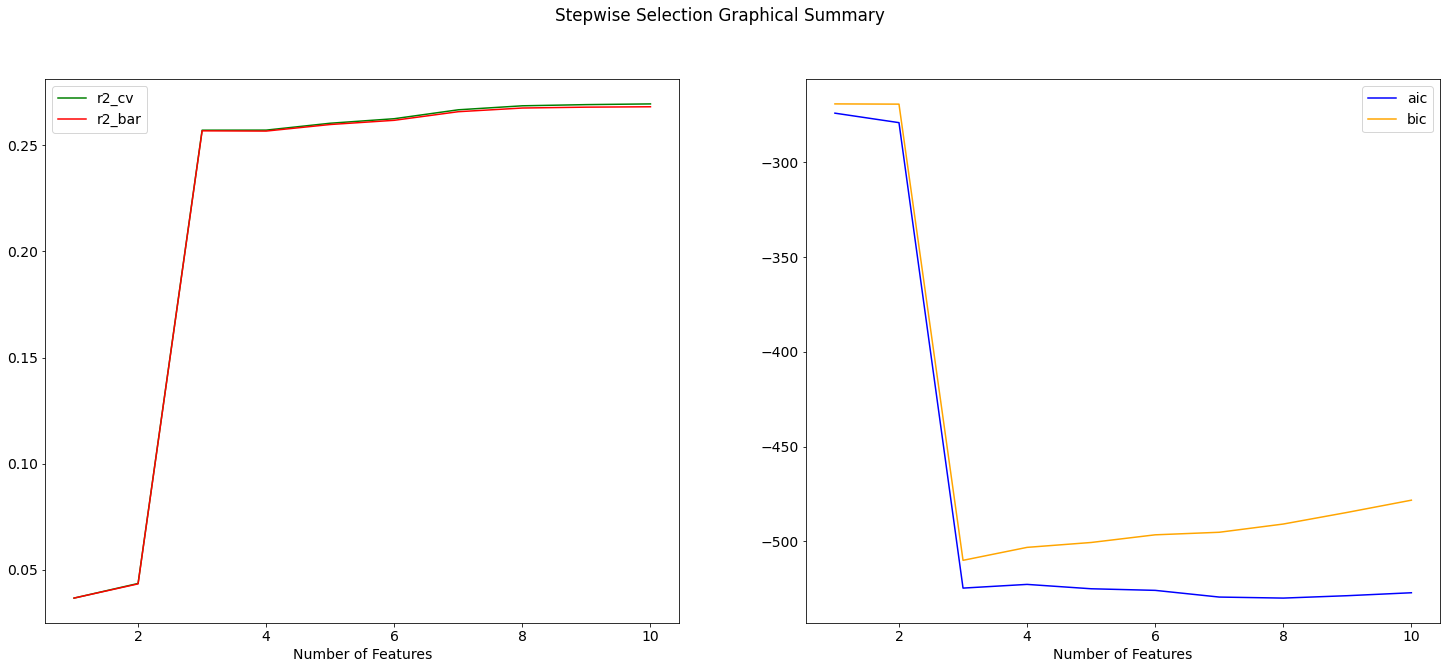

In [15]:
stepwiseSelection(ridge, X, y)

### Lasso Regression

In [16]:
lasso = linear_model.Lasso()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:46   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


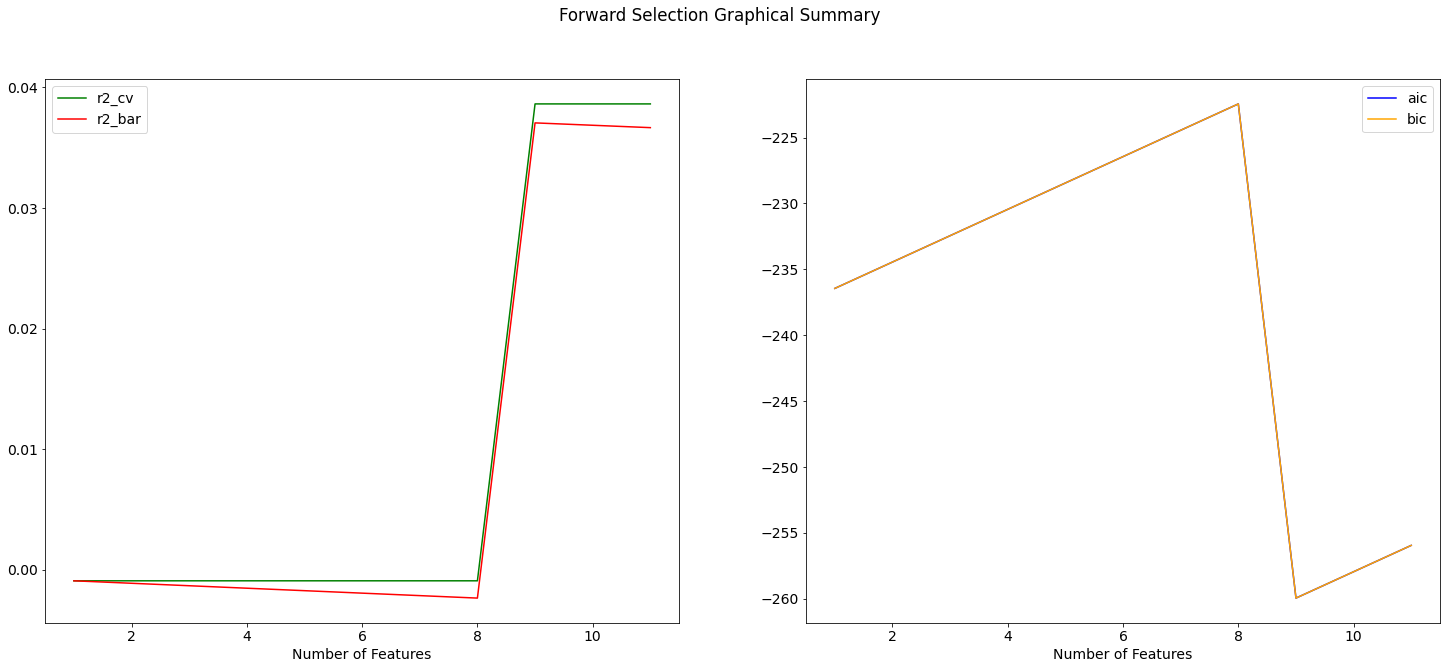

In [17]:
forwardSelection(lasso, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:48   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


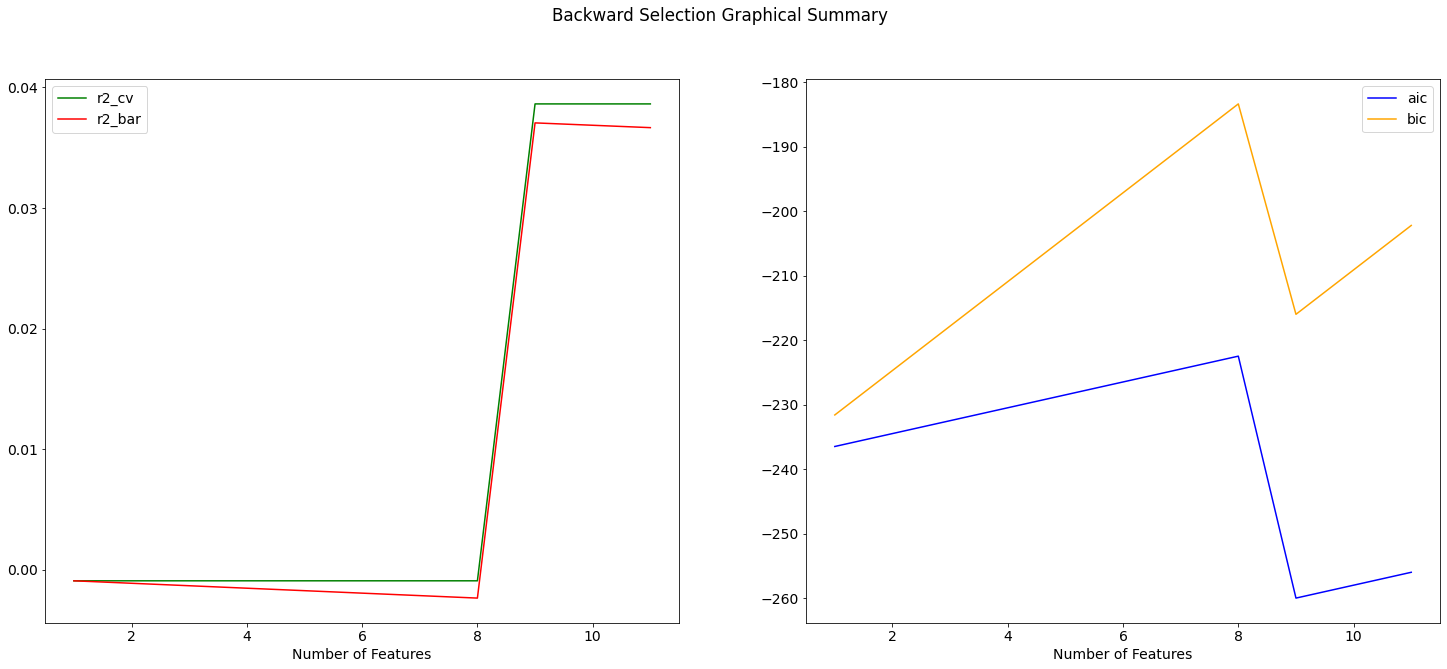

In [18]:
backwardSelection(lasso, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:49   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


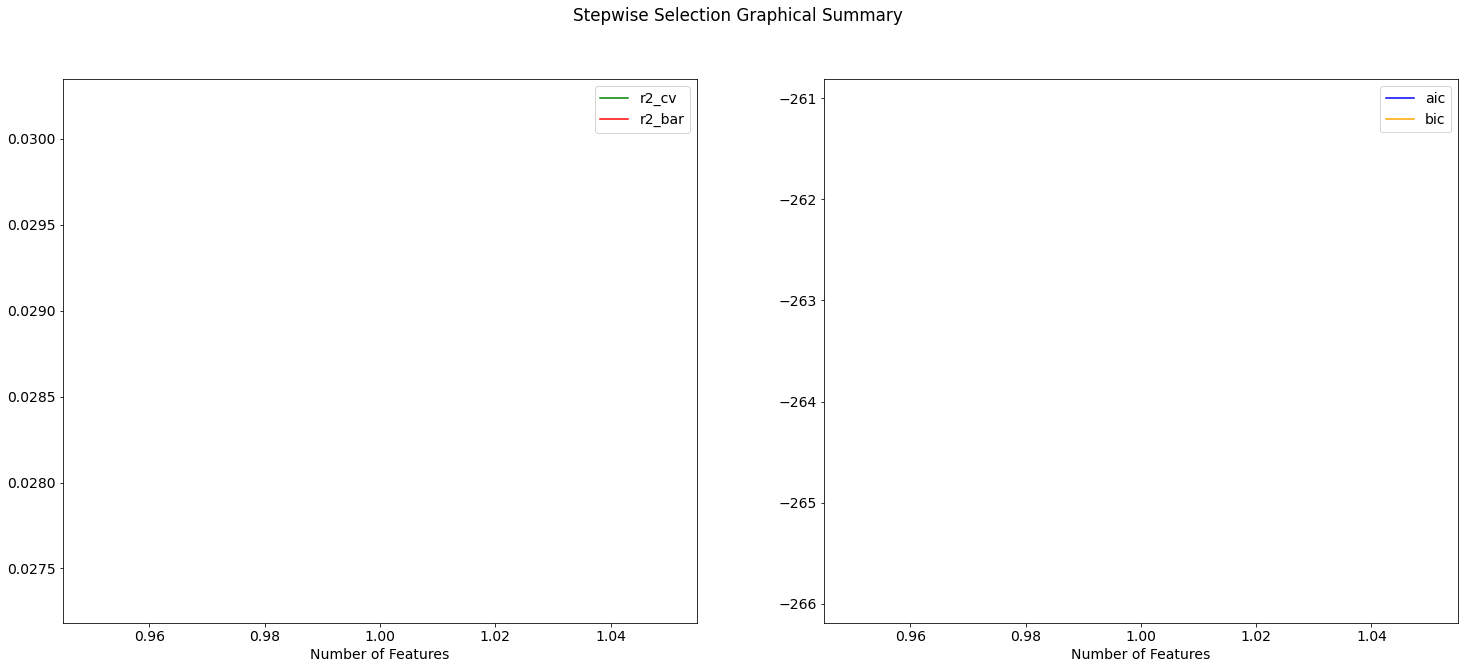

In [19]:
stepwiseSelection(lasso, X, y)

### Symbolic Regression

In [20]:
sym_reg = SymbolicRegressor()


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:16:51   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


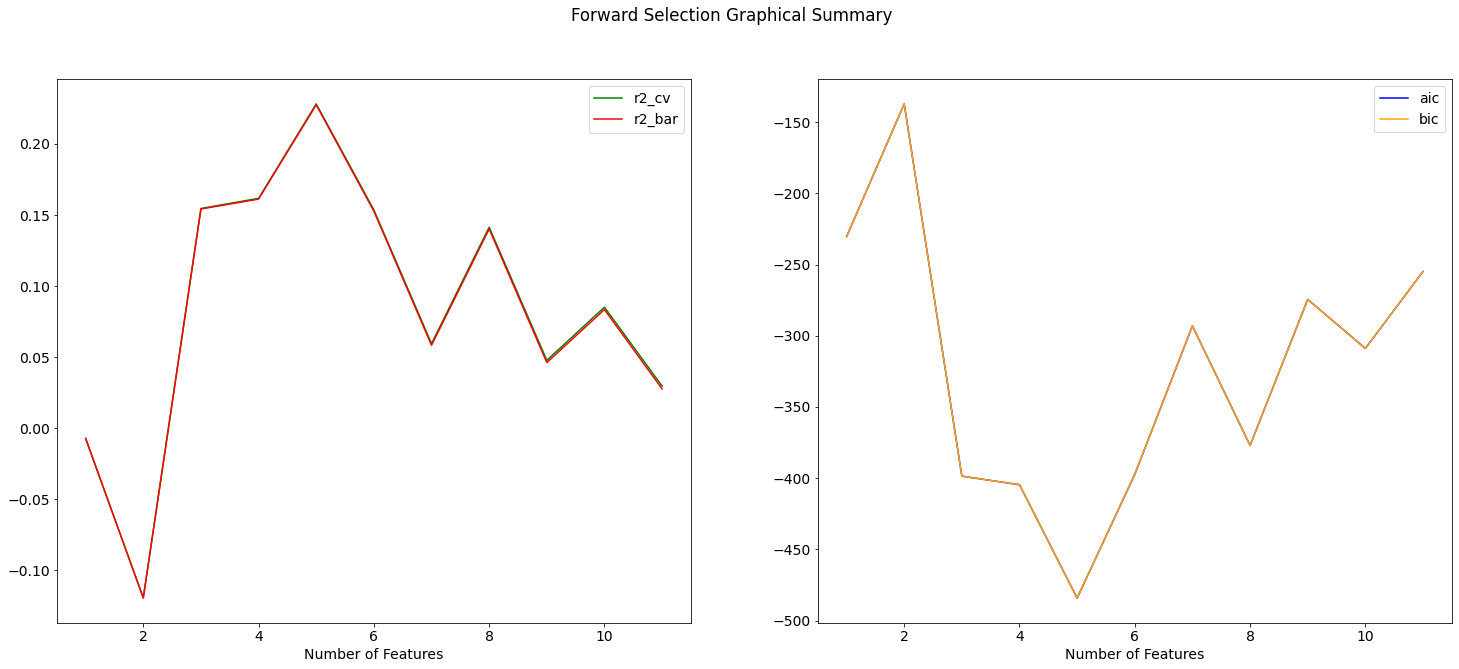

In [21]:
forwardSelection(sym_reg, X, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:34:47   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


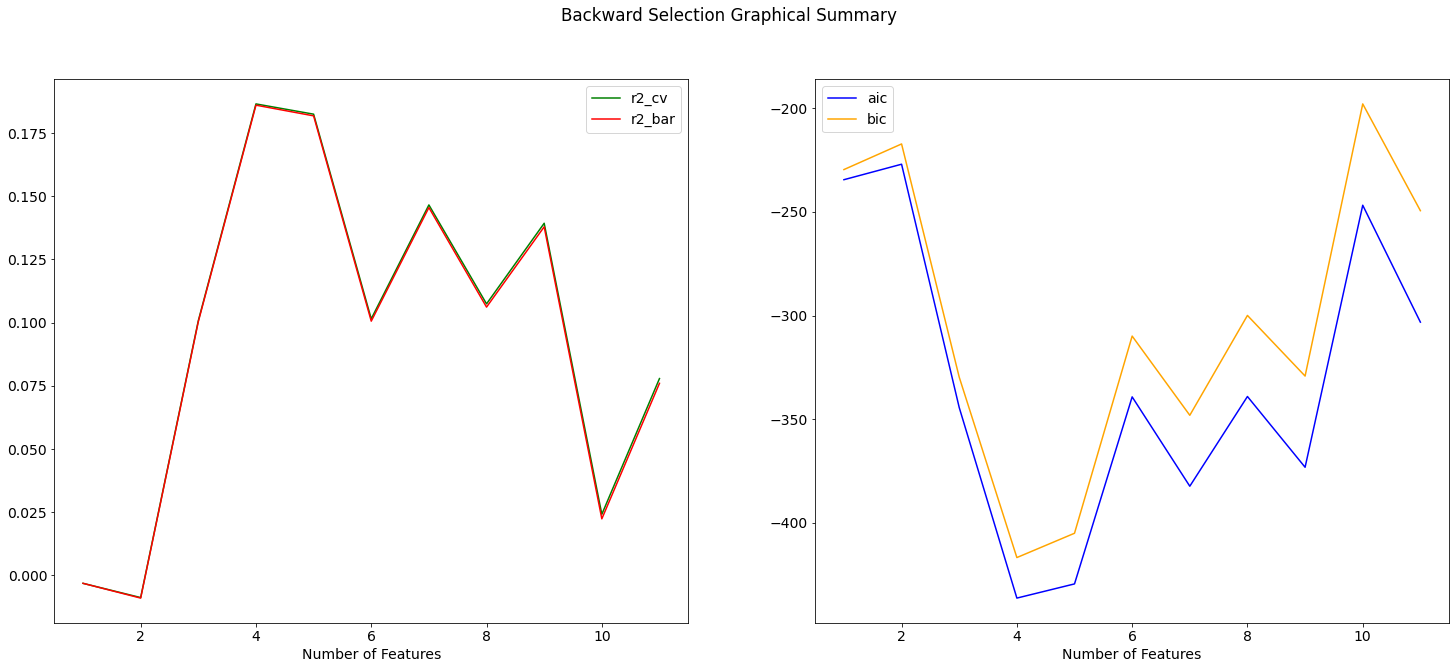

In [22]:
backwardSelection(sym_reg, X, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:49:32   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
con

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


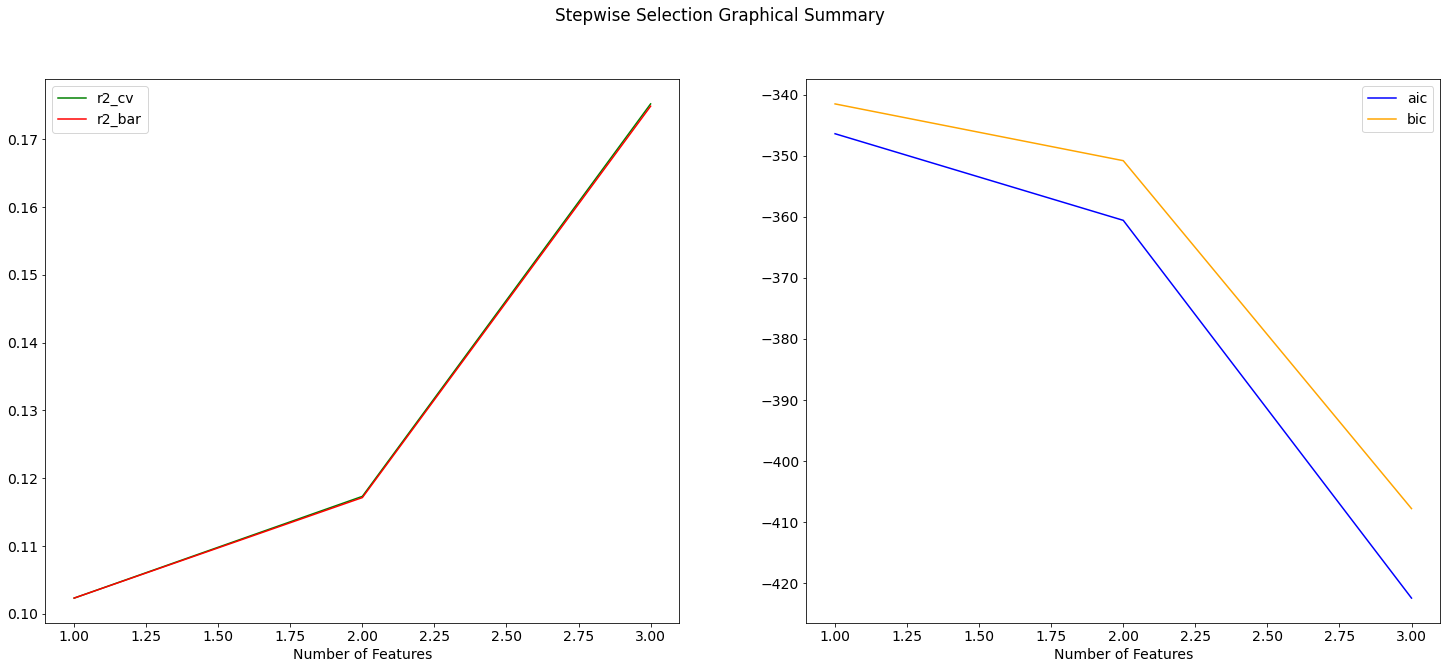

In [23]:
stepwiseSelection(sym_reg, X, y)

### Quadratic Regression

In [24]:
quad_reg = PolynomialFeatures(degree=2)
X_quad = quad_reg.fit_transform(X)
X_quad = pd.DataFrame(X_quad, columns=quad_reg.get_feature_names())
lr_q = linear_model.LinearRegression()
X_quad.apply(lambda col: col.reset_index(drop=True))
X_quad = X_quad.drop(columns = ["1"])
y_quad = y.reset_index(drop=True)
X_quad

C:\Users\spenc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x7^2,x7 x8,x7 x9,x7 x10,x8^2,x8 x9,x8 x10,x9^2,x9 x10,x10^2
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,...,1.002001,3.003000,0.450450,8.808800,9.0000,1.3500,26.400,0.2025,3.960,77.44
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,...,0.988036,3.280200,0.487060,9.443000,10.8900,1.6170,31.350,0.2401,4.655,90.25
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,...,0.990224,3.244026,0.437844,10.050510,10.6276,1.4344,32.926,0.1936,4.444,102.01
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,...,0.991219,3.175964,0.398240,9.856440,10.1761,1.2760,31.581,0.1600,3.960,98.01
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,...,0.991219,3.175964,0.398240,9.856440,10.1761,1.2760,31.581,0.1600,3.960,98.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,0.982358,3.241028,0.495570,11.100768,10.6929,1.6350,36.624,0.2500,5.600,125.44
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,0.989826,3.133935,0.457654,9.551040,9.9225,1.4490,30.240,0.2116,4.416,92.16
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,0.985136,2.967695,0.456568,9.329876,8.9401,1.3754,28.106,0.2116,4.324,88.36
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,...,0.977508,3.302225,0.375702,12.655232,11.1556,1.2692,42.752,0.1444,4.864,163.84



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     36.43
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:01:54   Log-Likelihood:                -5231.2
No. Observations:                4898   AIC:                         1.062e+04
Df Residuals:                    4820   BIC:                         1.113e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7355.9554   

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


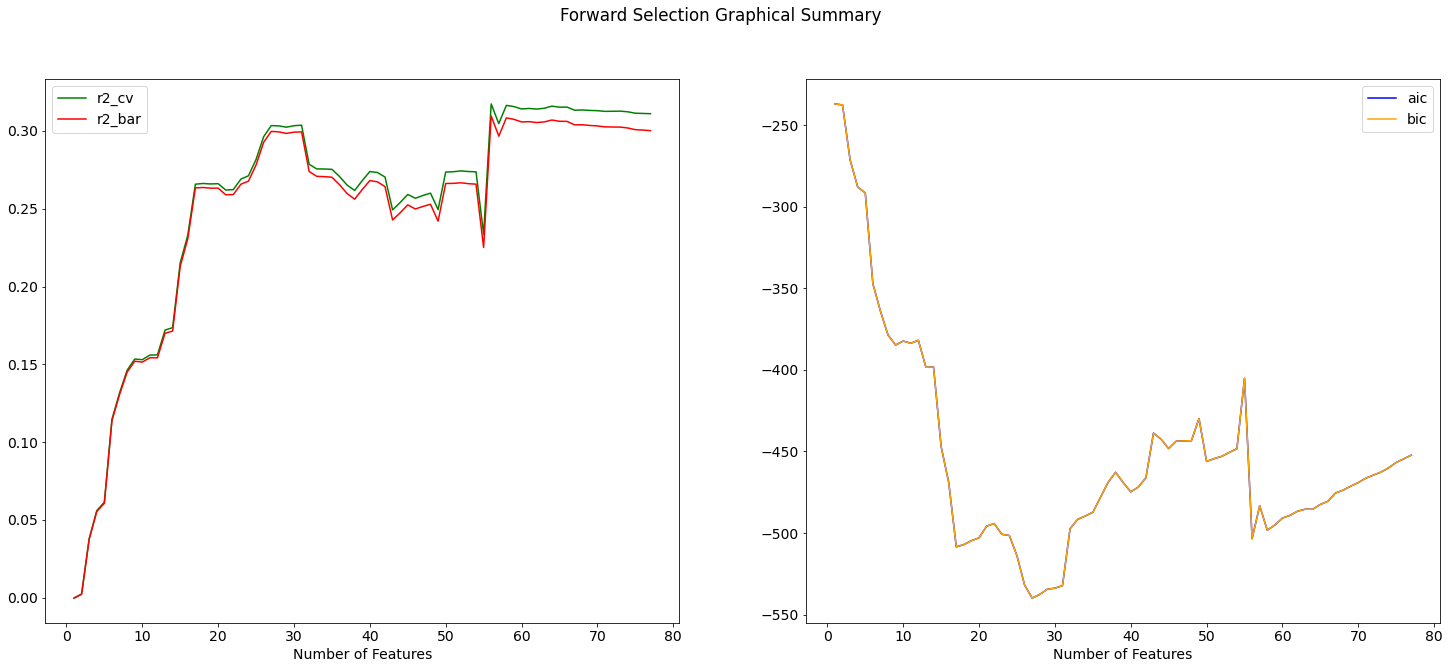

In [25]:
forwardSelection(lr_q, X_quad, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     36.43
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:02:02   Log-Likelihood:                -5231.2
No. Observations:                4898   AIC:                         1.062e+04
Df Residuals:                    4820   BIC:                         1.113e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7355.9554  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


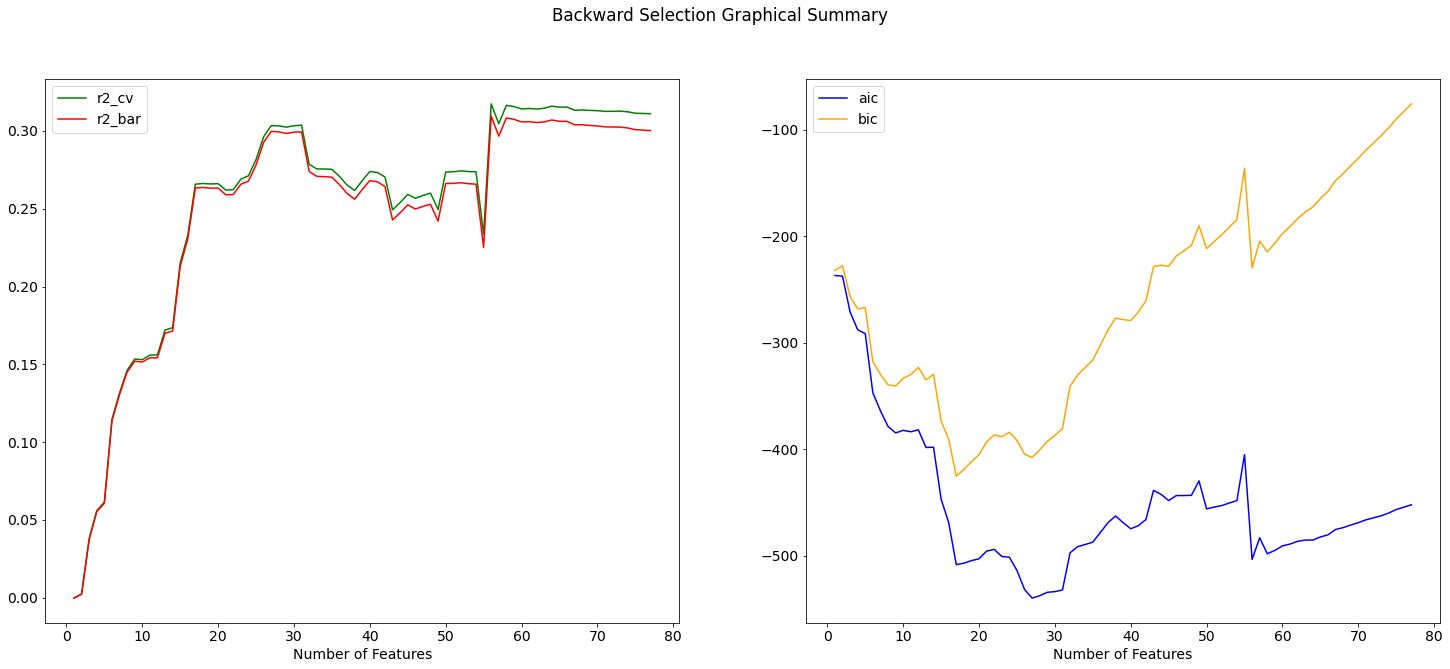

In [26]:
backwardSelection(lr_q, X_quad, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     36.43
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:02:09   Log-Likelihood:                -5231.2
No. Observations:                4898   AIC:                         1.062e+04
Df Residuals:                    4820   BIC:                         1.113e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7355.9554  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


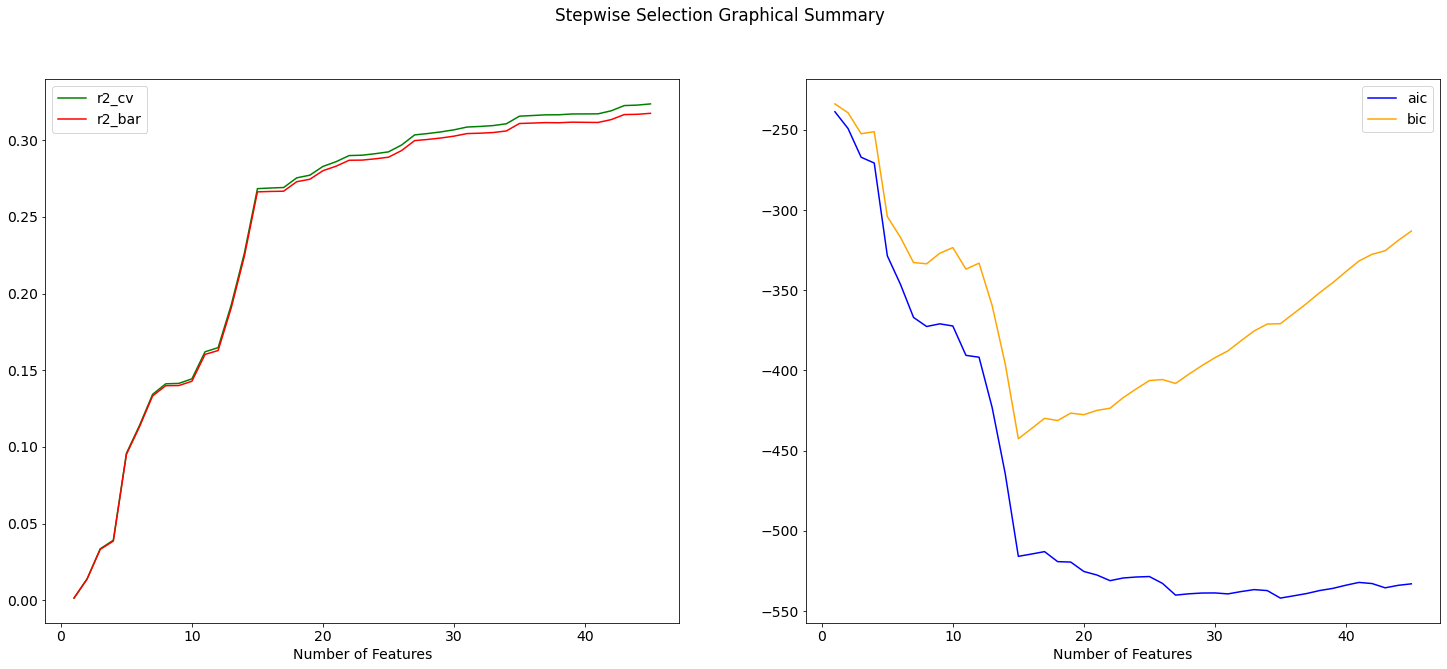

In [27]:
stepwiseSelection(lr_q, X_quad, y)

### Cubic Regression

In [28]:
cub_reg = PolynomialFeatures(degree=3)
X_cubic = cub_reg.fit_transform(X)
X_cubic = pd.DataFrame(X_cubic, columns=cub_reg.get_feature_names())
lr_c = linear_model.LinearRegression()
X_cubic.apply(lambda col: col.reset_index(drop=True))
X_cubic = X_cubic.drop(columns = ["1"])
y_cub = y.reset_index(drop=True)
X_cubic

C:\Users\spenc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x8^3,x8^2 x9,x8^2 x10,x8 x9^2,x8 x9 x10,x8 x10^2,x9^3,x9^2 x10,x9 x10^2,x10^3
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,...,27.000000,4.050000,79.20000,0.607500,11.88000,232.3200,0.091125,1.78200,34.8480,681.472
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,...,35.937000,5.336100,103.45500,0.792330,15.36150,297.8250,0.117649,2.28095,44.2225,857.375
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,...,34.645976,4.676144,107.33876,0.631136,14.48744,332.5526,0.085184,1.95536,44.8844,1030.301
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,...,32.461759,4.070440,100.74339,0.510400,12.63240,312.6519,0.064000,1.58400,39.2040,970.299
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,...,32.461759,4.070440,100.74339,0.510400,12.63240,312.6519,0.064000,1.58400,39.2040,970.299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,34.965783,5.346450,119.76048,0.817500,18.31200,410.1888,0.125000,2.80000,62.7200,1404.928
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,31.255875,4.564350,95.25600,0.666540,13.91040,290.3040,0.097336,2.03136,42.3936,884.736
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,26.730899,4.112446,84.03694,0.632684,12.92876,264.1964,0.097336,1.98904,40.6456,830.584
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,...,37.259704,4.239128,142.79168,0.482296,16.24576,547.2256,0.054872,1.84832,62.2592,2097.152



FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:02:15   Log-Likelihood:                -4844.5
No. Observations:                4898   AIC:                         1.039e+04
Df Residuals:                    4546   BIC:                         1.268e+04
Df Model:                         351                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.154e+05   

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:239: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


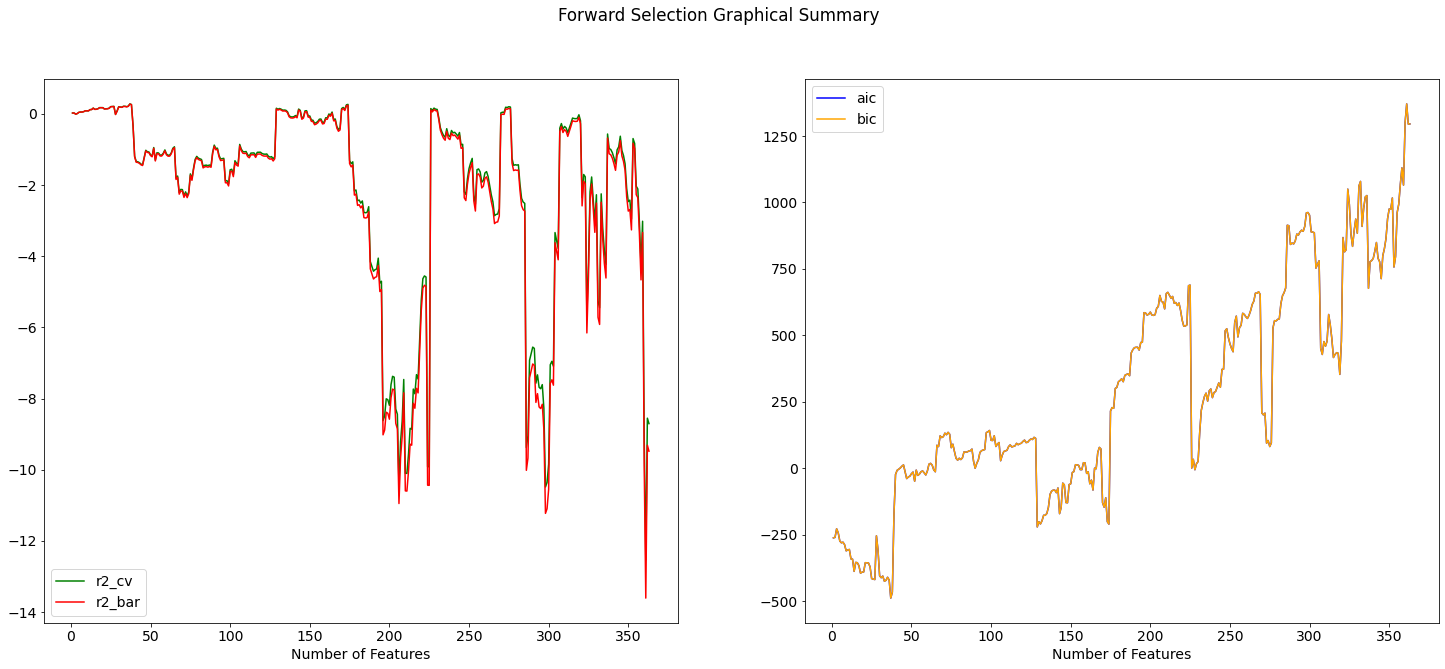

In [29]:
forwardSelection(lr_c, X_cubic, y)


BACKWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:04:36   Log-Likelihood:                -4844.5
No. Observations:                4898   AIC:                         1.039e+04
Df Residuals:                    4546   BIC:                         1.268e+04
Df Model:                         351                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.154e+05  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


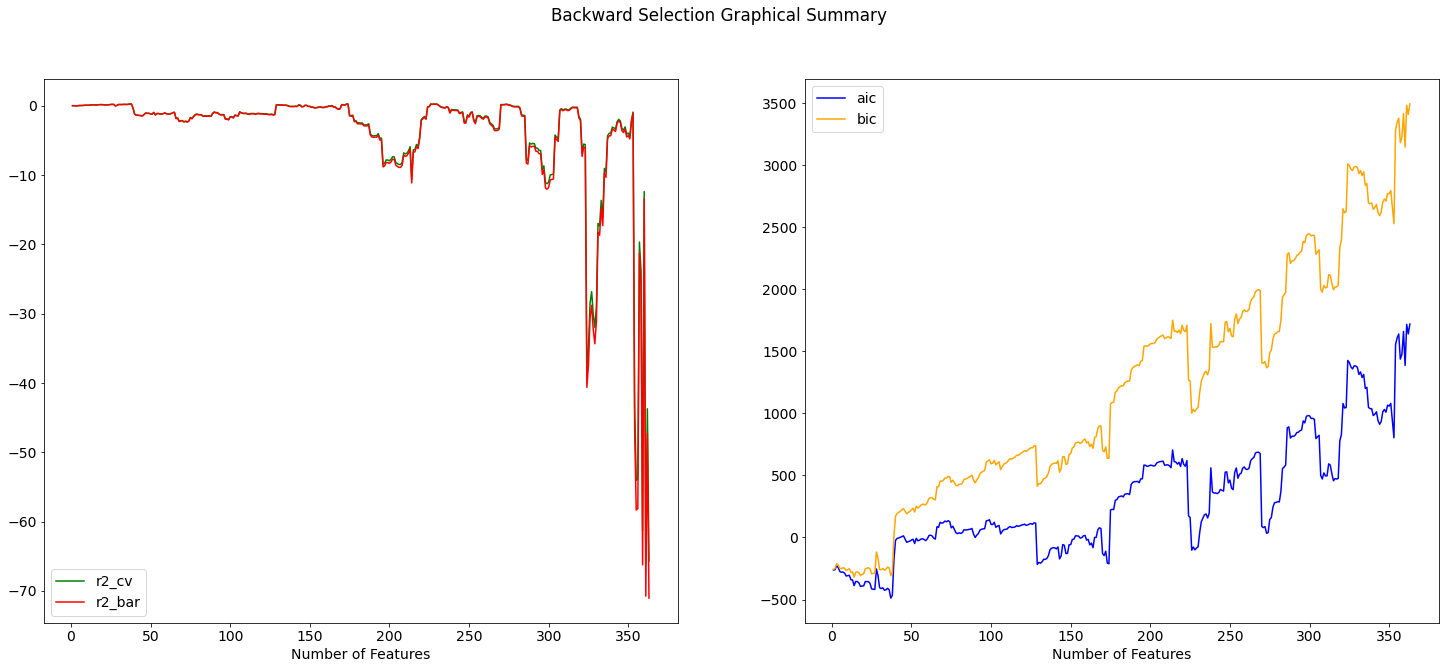

In [30]:
backwardSelection(lr_c, X_cubic, y)


STEPWISE SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:06:58   Log-Likelihood:                -4844.5
No. Observations:                4898   AIC:                         1.039e+04
Df Residuals:                    4546   BIC:                         1.268e+04
Df Model:                         351                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.154e+05  

c:\Users\spenc\Desktop\UGA_projects\DS2_P1\python\Model_Parent_2.py:479: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


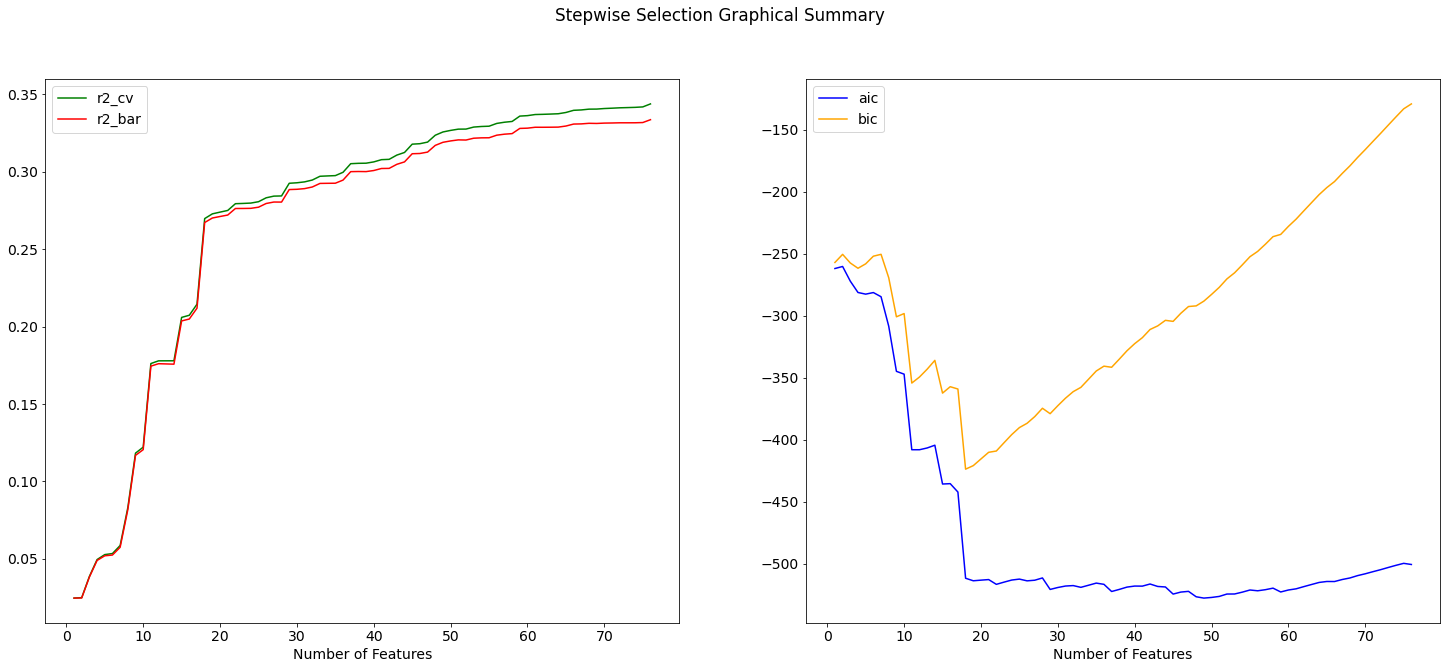

In [31]:
stepwiseSelection(lr_c, X_cubic, y)